It's not wildly off base to remark that a *dendrogram*, the visual result of Hierarchical Clustering, looks sort of like a Decision Tree, but in reverse.

(Pulled from Google Images)

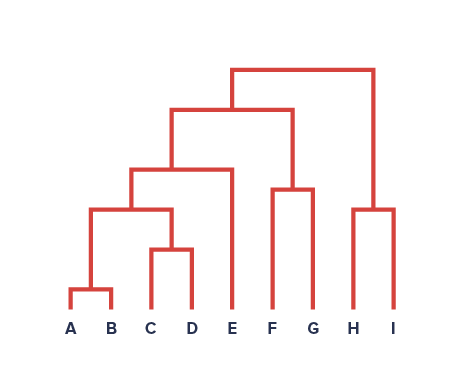

In [1]:
from IPython.display import Image

Image('images/dendrogram.PNG')

But whereas the Decision Tree starts from *all points collected together* and making successive splits to separate the data, Hierarchical Clustering starts with *all disjoint points* and iteratively finds groupings of similar points.

## Algorithm

Actually performing Hierarchical Clustering all begins with some measure of "dissimilarity." For the dataset below, we might consider the pairwise Euclidean Distance from point to point

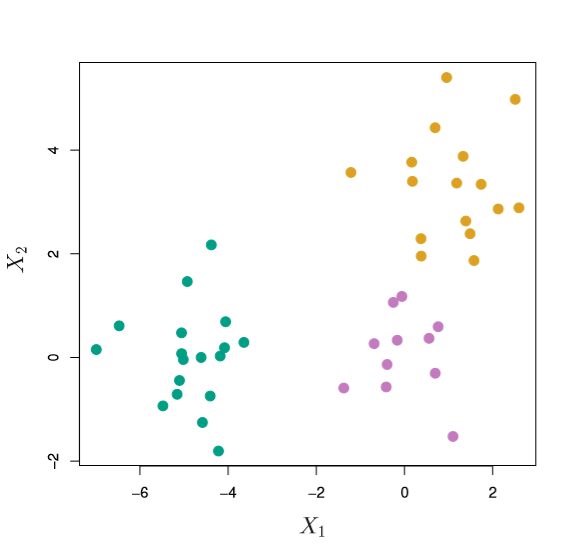

In [2]:
Image('images/fig_10_8.PNG')

Then we do the following (per ISL) until we've blobbed together every point:

```
1. Make each point its own unique cluster

2. While len(clusters) > 1:

    a. Examine all inter-cluster, pairwise dissimilarities
    b. Find the smallest value between two clusters
    c. Fuse them into one cluster
    d. Compute the new pairwise, inter-cluster dissimilarities
```

And if you've got a dissimlarity measure picked out, the first step of this (for all `n` distinct points) is pretty trivial. However, when you graduate to multi-point clusters, it requires more thought.

From here, step `2d` requires you to pick a *linkage function* for handling cluster vs cluster calculation. Summarizing the popular methods, we have:

- Complete: Compute all pairwise dissimilarities and take the max.
- Single: Compute all pairwise dissimilarities and take the min.
- Average: Compute all pairwise dissimilarities and take the average.
- Centroid: Average the points in each cluster, *then* compute the pairwise dissimilarity

Complete and Average are said to make for more balanced trees than Single, as shown below.

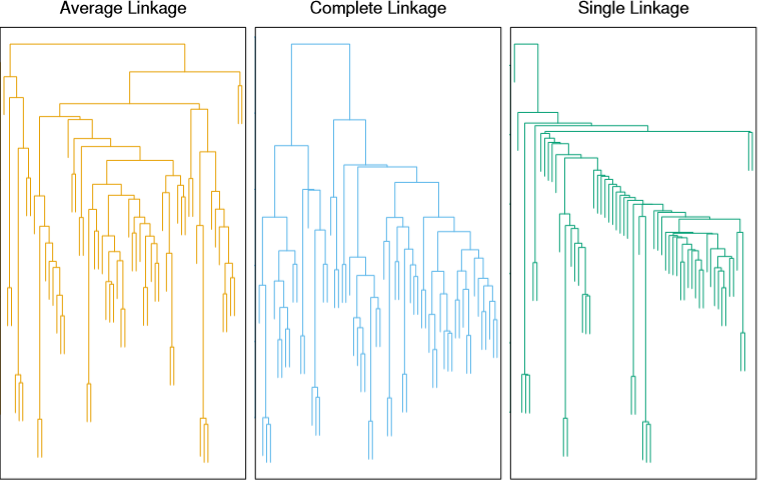

In [3]:
Image('images/fig_10_12.PNG')

Finally, we can draw a horizontal line at any of various levels along the dendrogram to arrive at `m` different groups. The closer two terminal points are to one another, vertically, the more similar they are.

**Note**: There is *no* concept of horizontal similarity when looking at these visuals. It's merely a product of how the graphics are built.

## Considerations

### Dissimilarity Measure

In the example above, we used Euclidean Distance as our measure for dissimilarity. However, ISL presents a compelling example to consider other statistics.

Take a hypothetical Amazon dataset, for instance. If each row is a user of the site and each column represents the quantity of purchases for a given item, then we wind up with a *very* sparse dataset. Working with other clustering algorithms such as K-Means or KNN, we know that this leads quickly to the curse of dimensionality.

Suppose instead, we used Correlation between two clients. This could afford insight into overlaps of cross-product preferences in a way that simple distance cannot.

### Scaling Features

Extending this shopping example, the following 3 charts represent the same two features, but scaled differently

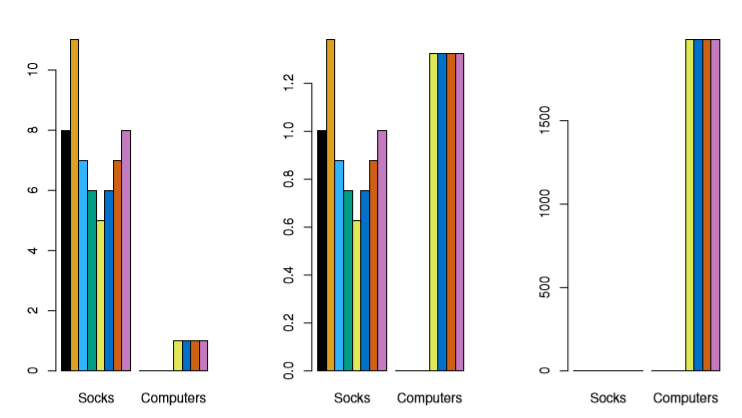

In [4]:
Image('images/fig_10_14.PNG')

As you can see, feature normalization can have a huge impact on how your algorithm churns through your data (the last panel is count * cost)